In [1]:
import os, sys, math, ROOT
from array import array
import numpy as np
# %jsroot on

#Importing a helper file where some functions are defined
from helper import *

#Input file
inputfile = ROOT.TFile("datasets/data.root","READ")

#Output file
outputfile = ROOT.TFile("output.root","RECREATE")

#Accessing the "TTree" from root that contains the data (one entry per event)
tree = inputfile.Get("ntuplizer/tree")

nentries = 1000 # Run only on partial events to speed up the code
nentries = tree.GetEntries()
print("Number of entries: ", nentries)

Welcome to JupyROOT 6.30/03
Number of entries:  104317


In [2]:
#Example of histograms 
#The arguments are the following: 
#"name", "title;x axis title;yaxis title", nb of bins, min value, max value
hist_npv = ROOT.TH1F("hist_NPV", "NPV;Number of reconstructed vertices;Events", 100, 0, 100)
hist_massfourleptons = ROOT.TH1F("hist_massfourleptons",";Four Lepton Invariant Mass;Events", 5000, 0, 500)

In [3]:
# Loop over entries
for i in range(0, nentries):
    # Load entry number i
    tree.GetEntry(i)
    #  Every 1000th entry, print some info
    if i % 1000 == 0:
        print("Event number", i, "\nNb of reconstructed vertices: ", tree._n_PV)
    # Fill the number of reconstructed vertices in a histogram
    hist_npv.Fill(tree._n_PV)
    for lep in range(0,len(tree._lPt)):
    # Every 1000th entry, print some info about the leptons in the event
        if i%1000==0: 
            print("Lepton number", lep,
                ", pt:", '%.3f'%tree._lPt[lep], 
                ", eta:", '%.3f'%tree._lEta[lep], 
                ", phi:", '%.3f'%tree._lPhi[lep], 
                ", pdgid:", tree._lpdgId[lep]) # pdgid: e-=11, e+=-11, mu-=13, mu+=-13
      
    # Here you should do several loops and compute the invariant mass of the four leptons
    # The following 
    mass = invariantmass4l(tree, 0, 1, 2, 3)
    hist_massfourleptons.Fill(mass)

Event number 0 
Nb of reconstructed vertices:  24
Lepton number 0 , pt: 34.964 , eta: -1.037 , phi: -1.803 , pdgid: 11
Lepton number 1 , pt: 33.179 , eta: -2.424 , phi: 2.134 , pdgid: -11
Lepton number 2 , pt: 15.323 , eta: -1.394 , phi: -1.490 , pdgid: 11
Lepton number 3 , pt: 8.220 , eta: 1.524 , phi: -1.933 , pdgid: -11
Event number 1000 
Nb of reconstructed vertices:  41
Lepton number 0 , pt: 43.173 , eta: 1.893 , phi: 0.957 , pdgid: -11
Lepton number 1 , pt: 35.233 , eta: 1.102 , phi: -2.253 , pdgid: 11
Lepton number 2 , pt: 7.624 , eta: 1.112 , phi: -2.073 , pdgid: 11
Lepton number 3 , pt: 18.715 , eta: 1.909 , phi: 2.597 , pdgid: 13
Event number 2000 
Nb of reconstructed vertices:  44
Lepton number 0 , pt: 40.422 , eta: 2.283 , phi: 2.283 , pdgid: -11
Lepton number 1 , pt: 39.406 , eta: 1.330 , phi: -1.187 , pdgid: 11
Lepton number 2 , pt: 5.257 , eta: -0.350 , phi: 1.108 , pdgid: 13
Lepton number 3 , pt: 5.097 , eta: -0.429 , phi: 1.077 , pdgid: 13
Event number 3000 
Nb of reco

In [4]:
c = ROOT.TCanvas("canvas","c_NPV",600,600)

Info in <TCanvas::Print>: pdf file canvas.pdf has been created


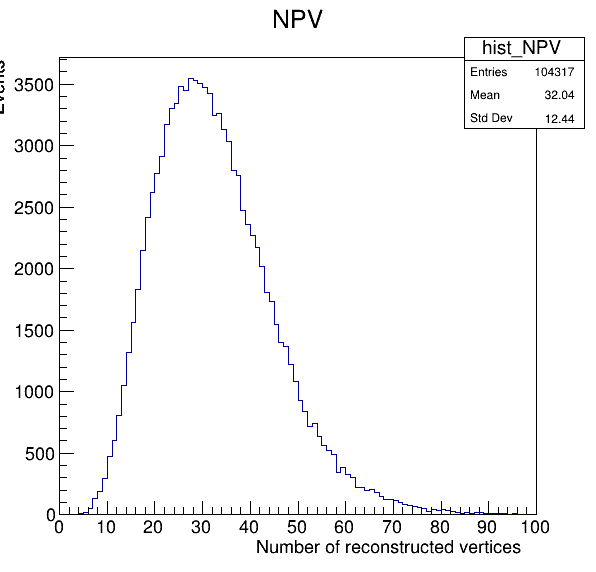

In [5]:
#Draw the histogram and the canvas
hist_npv.Draw()
c.Draw()
savehisto(outputfile, hist_massfourleptons, "hist_MassFourLeptons")

Info in <TCanvas::Print>: pdf file .//hist_MassFourLeptons_nolog.pdf has been created


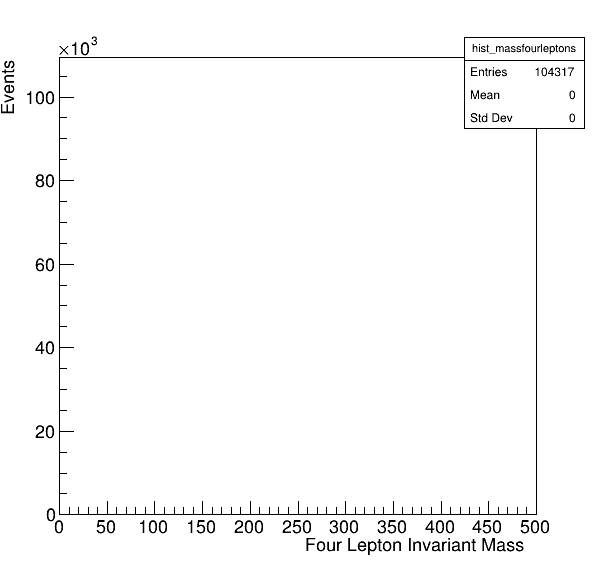

In [6]:
savehisto(outputfile, hist_massfourleptons, "hist_MassFourLeptons")
hist_massfourleptons.Draw()
c.Draw()